In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import glob

### Data Pipeline

In [2]:
test_yes_filepaths = glob.glob('Bone_Fracture_Binary_Classification\\test\\fractured\\*.jpg') + glob.glob('Bone_Fracture_Binary_Classification\\test\\fractured\\*.png')
test_no_filepaths = glob.glob('Bone_Fracture_Binary_Classification\\test\\not fractured\\*.jpg') + glob.glob('Bone_Fracture_Binary_Classification\\test\\not fractured\\*.png')
train_yes_filepaths = glob.glob('Bone_Fracture_Binary_Classification\\train\\fractured\\*.jpg') + glob.glob('Bone_Fracture_Binary_Classification\\train\\fractured\\*.jpeg') +glob.glob('Bone_Fracture_Binary_Classification\\train\\fractured\\*.png')
train_no_filepaths = glob.glob('Bone_Fracture_Binary_Classification\\train\\not fractured\\*.jpg') + glob.glob('Bone_Fracture_Binary_Classification\\train\\not fractured\\*.png')
val_yes_filepaths = glob.glob('Bone_Fracture_Binary_Classification\\val\\fractured\\*.png') + glob.glob('Bone_Fracture_Binary_Classification\\val\\fractured\\*.jpg') +glob.glob('Bone_Fracture_Binary_Classification\\val\\fractured\\*.jpeg')
val_no_filepaths = glob.glob('Bone_Fracture_Binary_Classification\\val\\not fractured\\*.png') + glob.glob('Bone_Fracture_Binary_Classification\\val\\not fractured\\*.jpg')

In [14]:
def preprocess_test_images(filepath):
    img = tf.io.read_file(filepath)
    img = tf.image.decode_image(img, channels=3, expand_animations=False)
    img = tf.image.resize_with_pad(img, 218, 180)
    img = tf.cast(img, tf.float32) / 255.0
    return img

In [4]:
testyesimgtensor = tf.TensorArray(tf.float32, size = 0 , dynamic_size = True)
trainyesimgtensor = tf.TensorArray(tf.float32, size = 0 , dynamic_size= True )
valyesimgtensor = tf.TensorArray(tf.float32 , size = 0 , dynamic_size = True)

In [5]:
testyesdataset = tf.data.Dataset.from_tensor_slices(test_yes_filepaths)
testyesdataset = testyesdataset.map(preprocess_test_images)

Image shape: (218, 180, 3)


In [6]:
trainyesdataset = tf.data.Dataset.from_tensor_slices(train_yes_filepaths)
trainyesdataset = trainyesdataset.map(preprocess_test_images)

Image shape: (218, 180, 3)


In [7]:
for img in trainyesdataset:
    if len(img.shape) != 3 or img.shape[2] != 3:
        print(f"Unexpected shape: {img.shape}")

In [8]:
valyesdataset = tf.data.Dataset.from_tensor_slices(val_yes_filepaths)
valyesdataset = valyesdataset.map(preprocess_test_images)

Image shape: (218, 180, 3)


In [9]:
for img in testyesdataset:
    testyesimgtensor = testyesimgtensor.write(testyesimgtensor.size() , img)
    
testyesimgtensor = testyesimgtensor.stack()

In [10]:
for im in trainyesdataset:
    trainyesimgtensor = trainyesimgtensor.write(trainyesimgtensor.size() , im)

In [11]:
for img in valyesdataset:
    valyesimgtensor = valyesimgtensor.write(valyesimgtensor.size() , img)

In [16]:
valyesimgtensor = valyesimgtensor.stack()

In [12]:
trainyesimgtensor = trainyesimgtensor.stack()

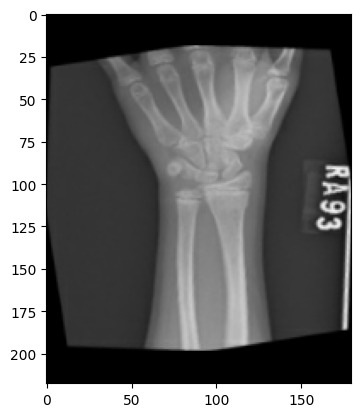

In [22]:
plt.figure()
plt.imshow(trainyesimgtensor[15])